In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\anura\Desktop\d\PCA\PCA\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.shape

(178, 14)

In [6]:
#missing the values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df["Type"].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


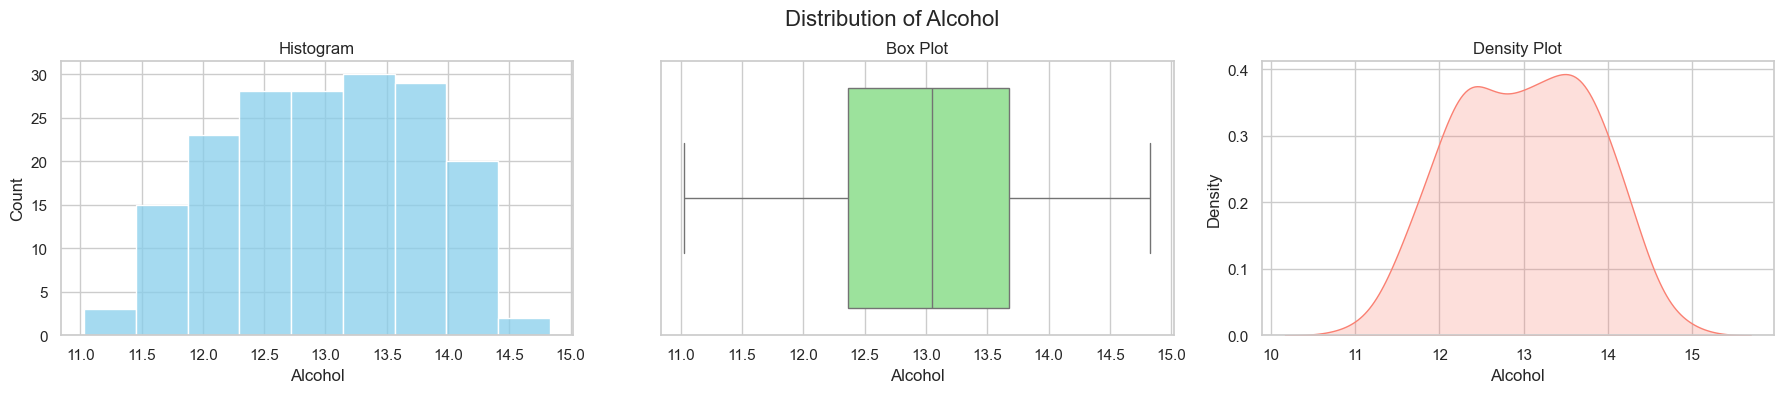

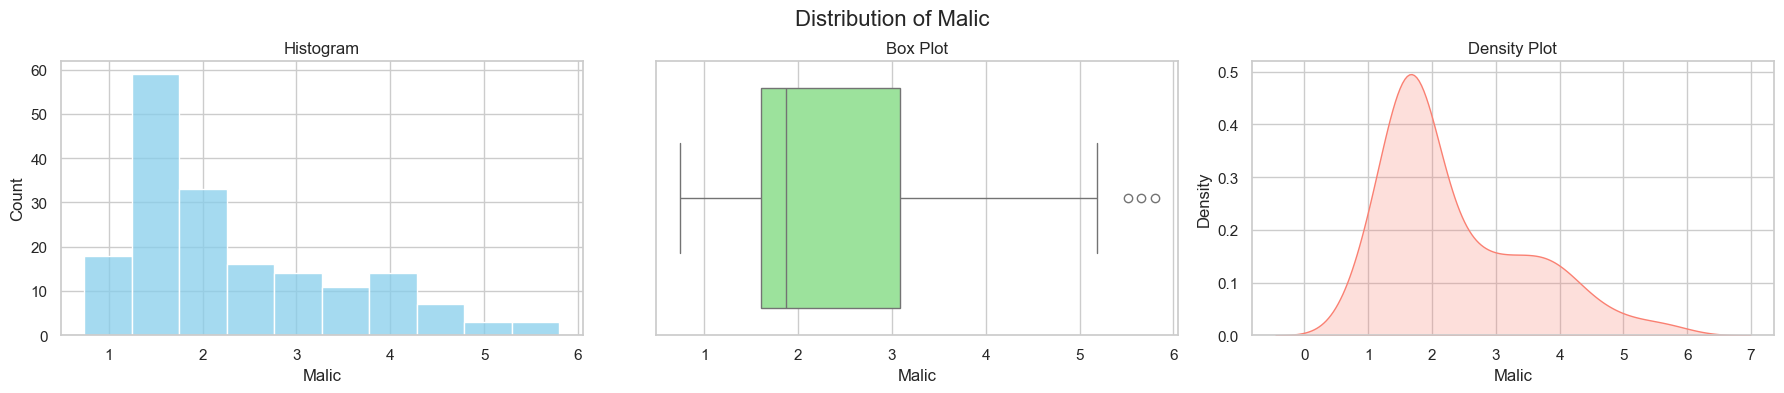

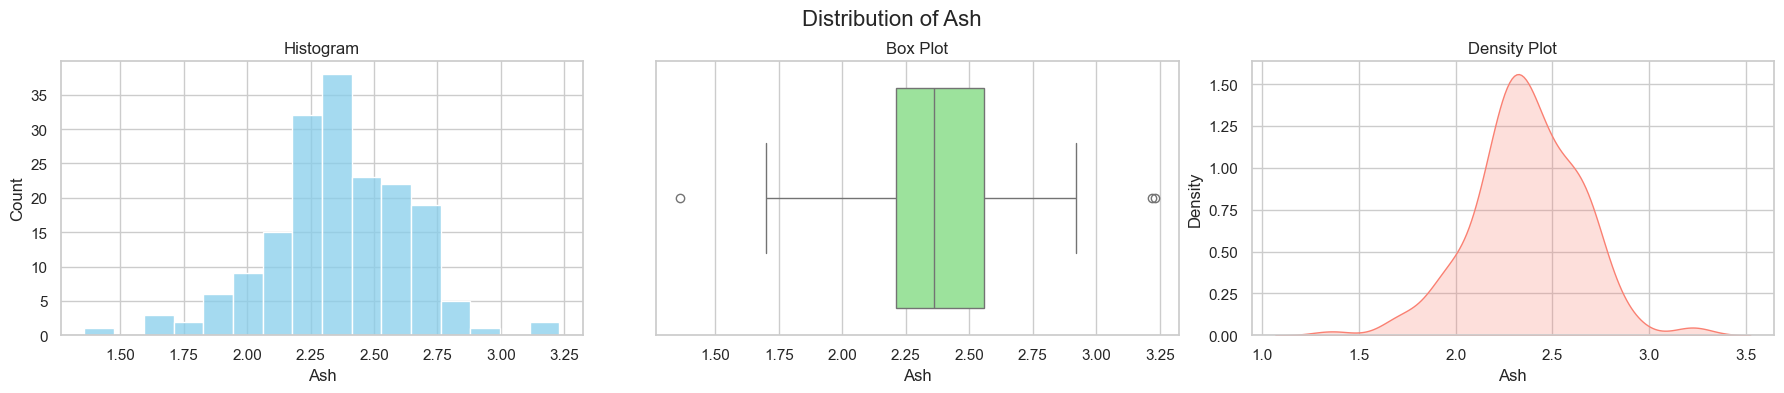

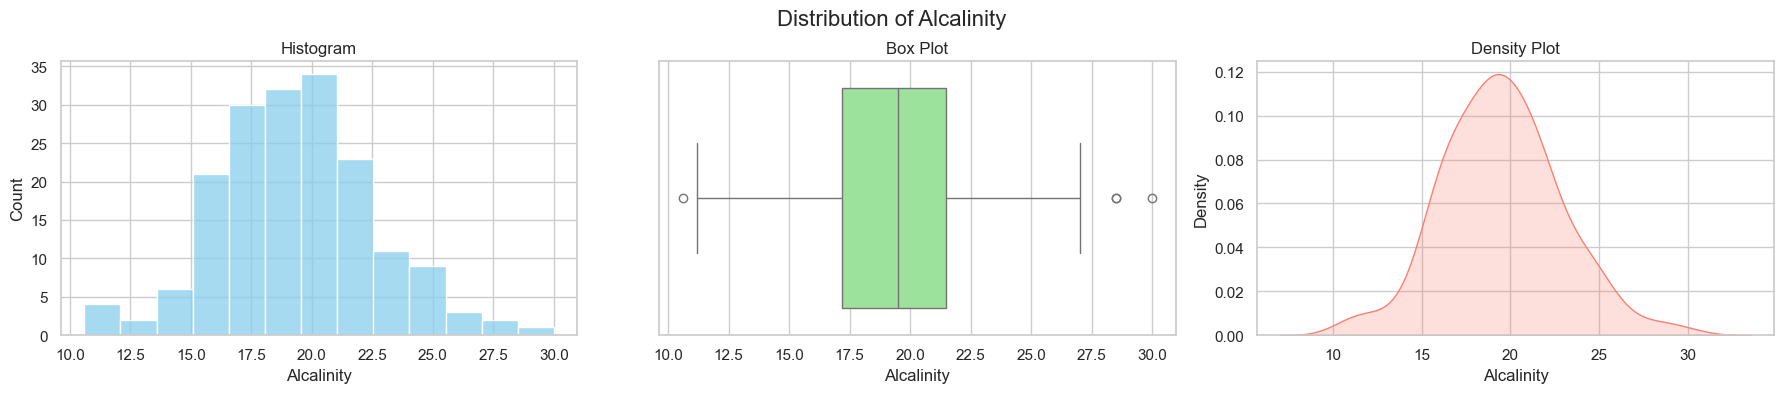

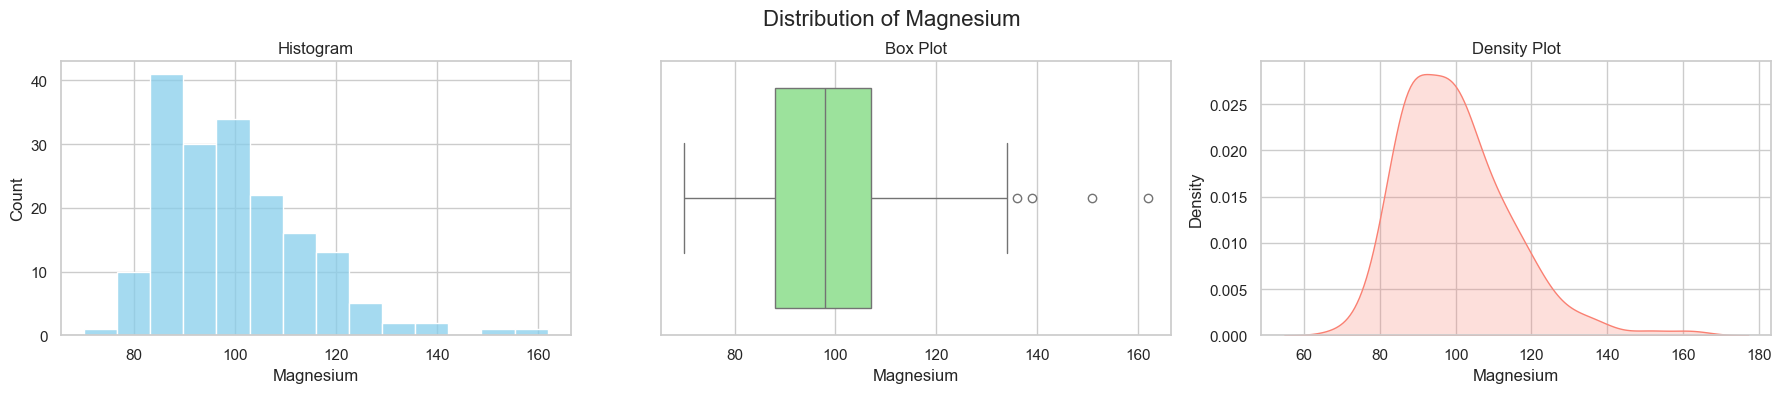

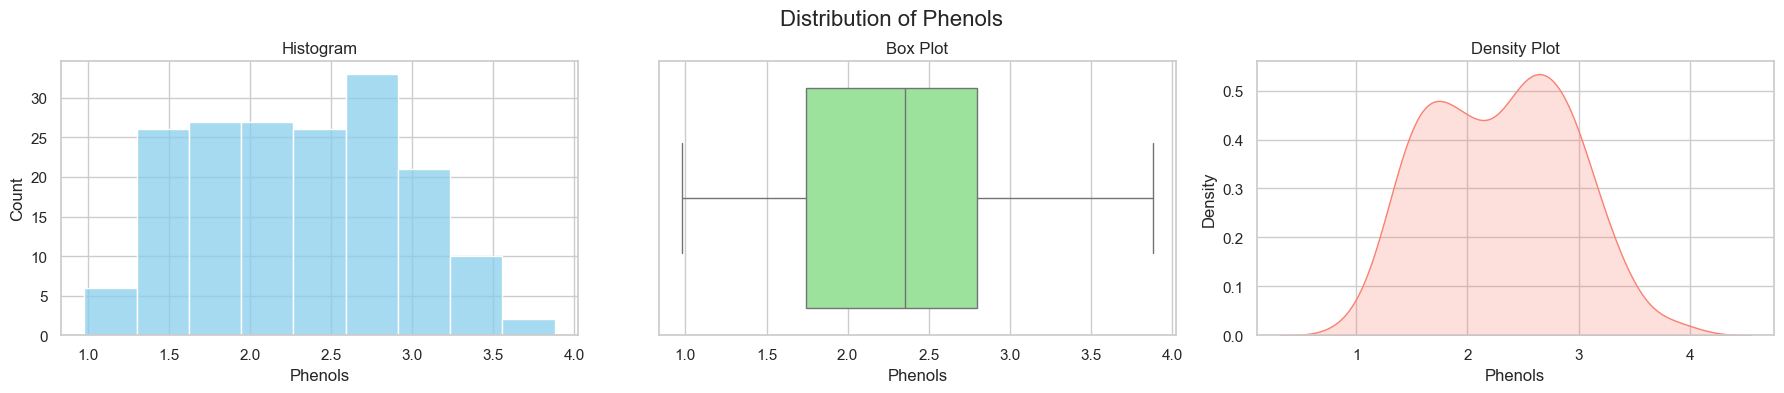

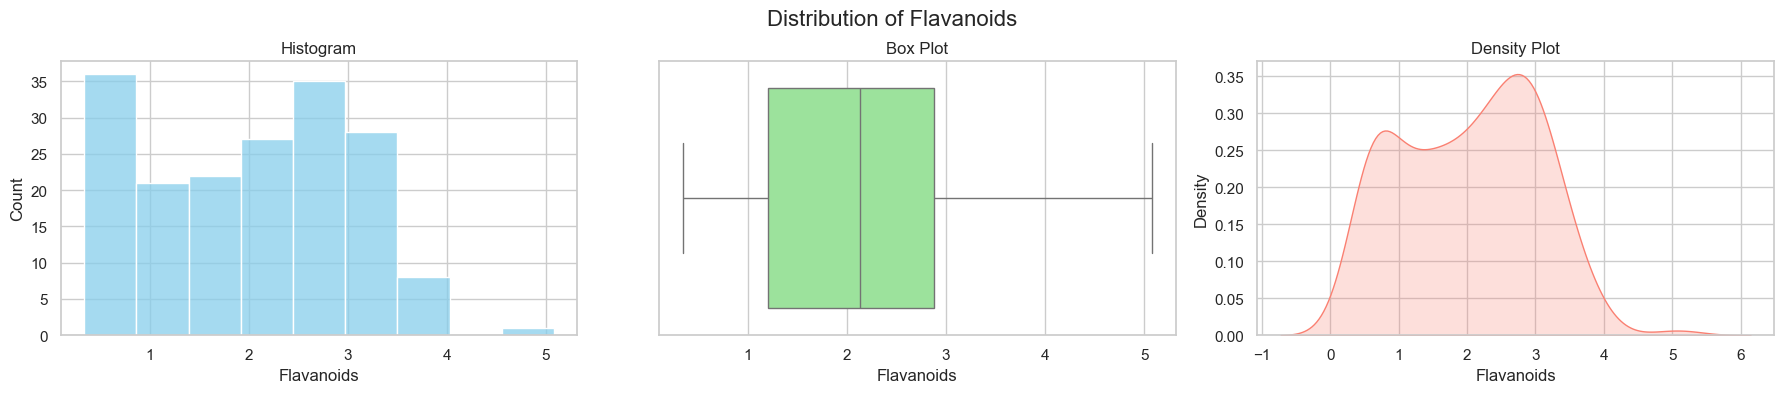

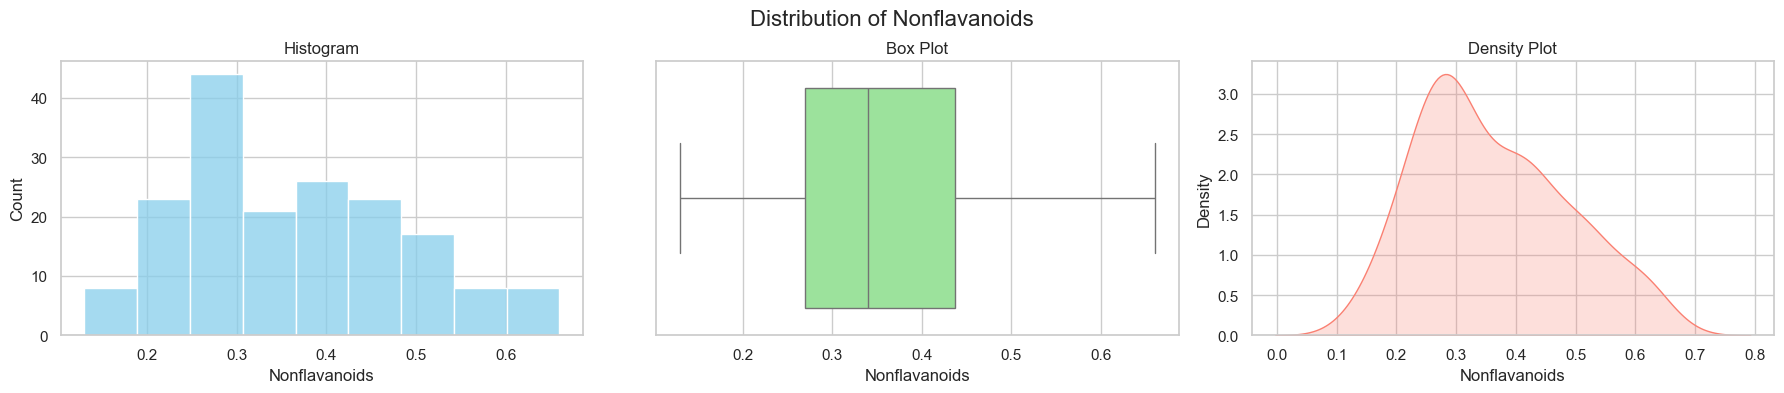

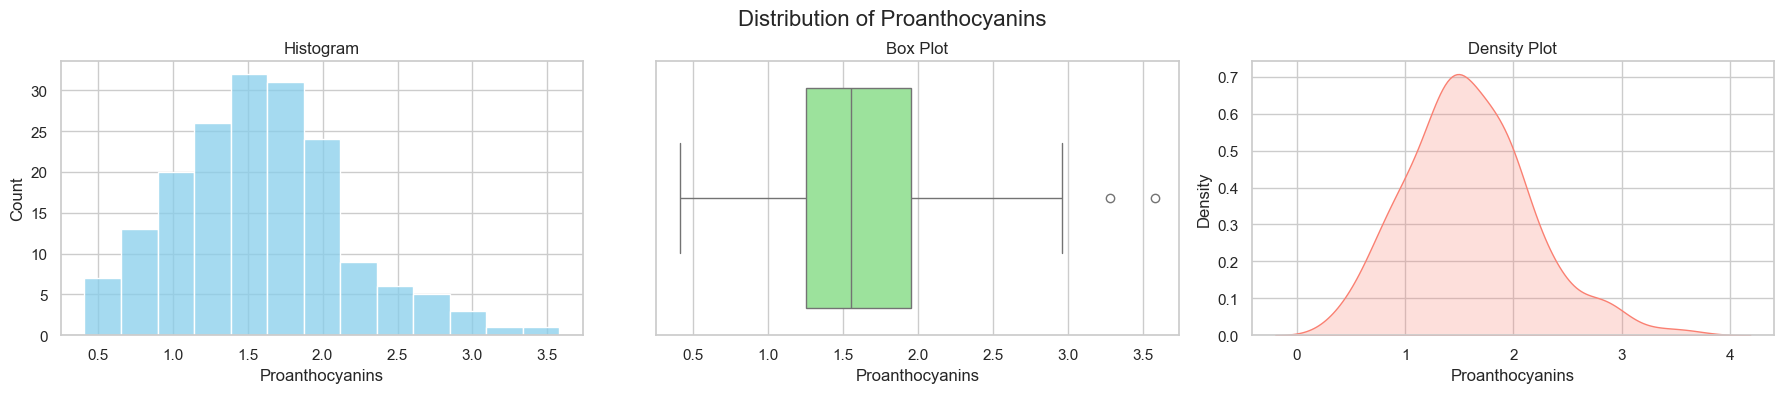

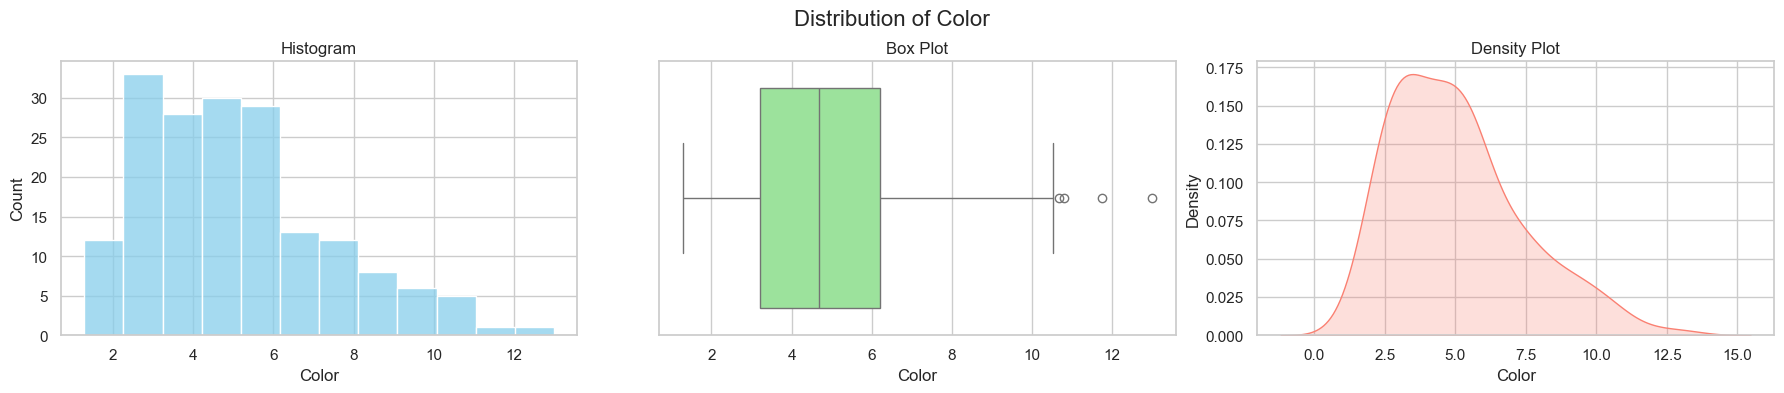

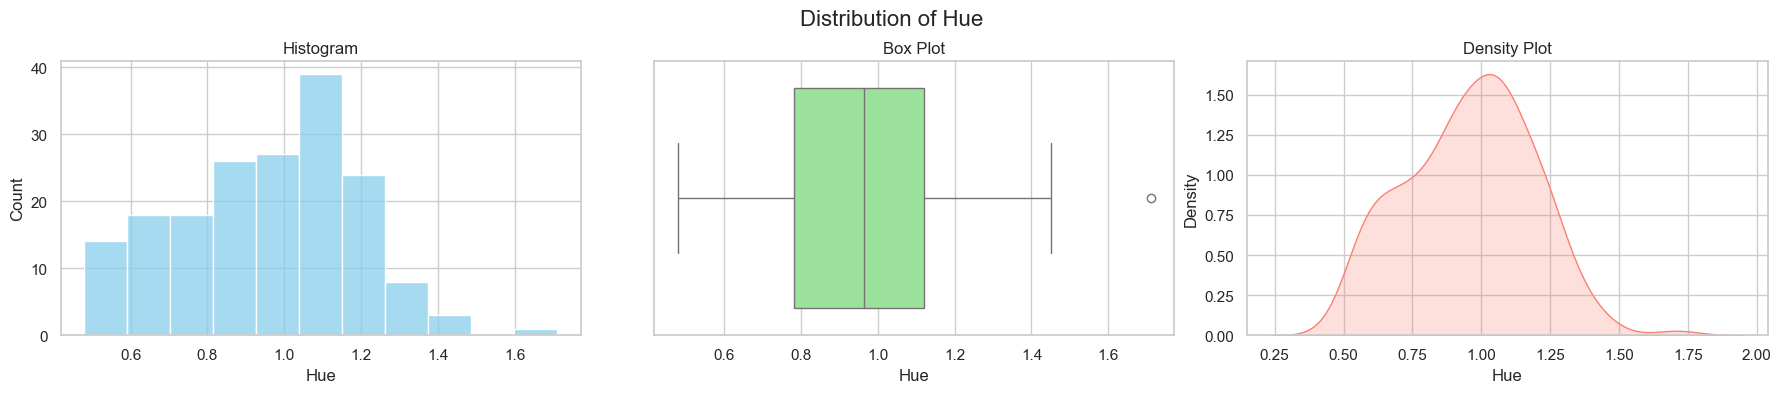

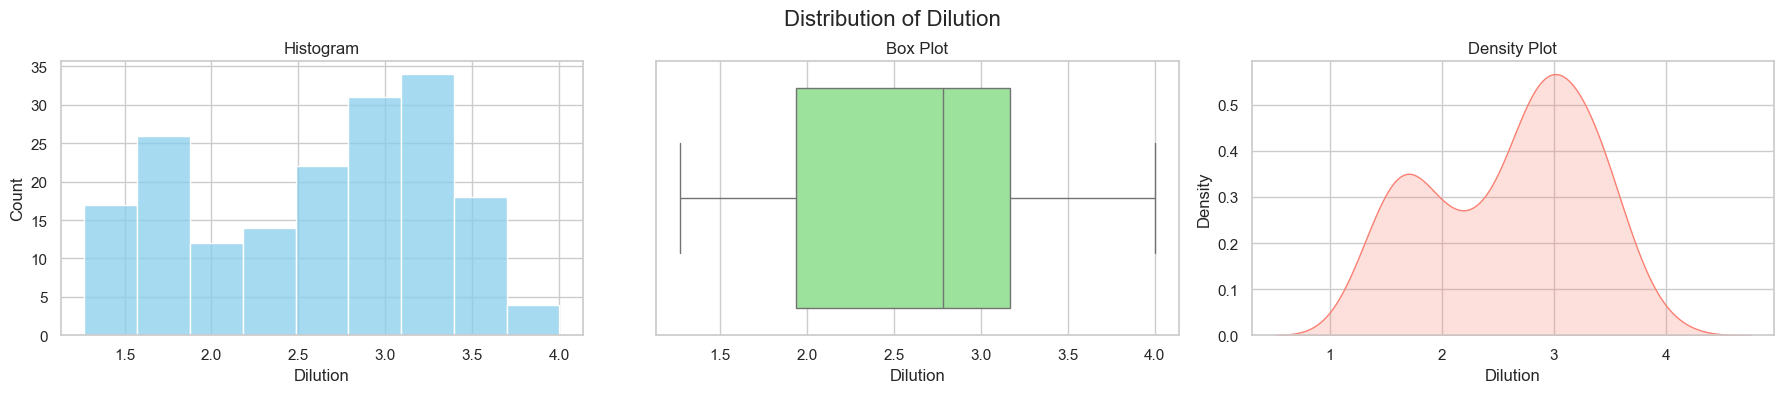

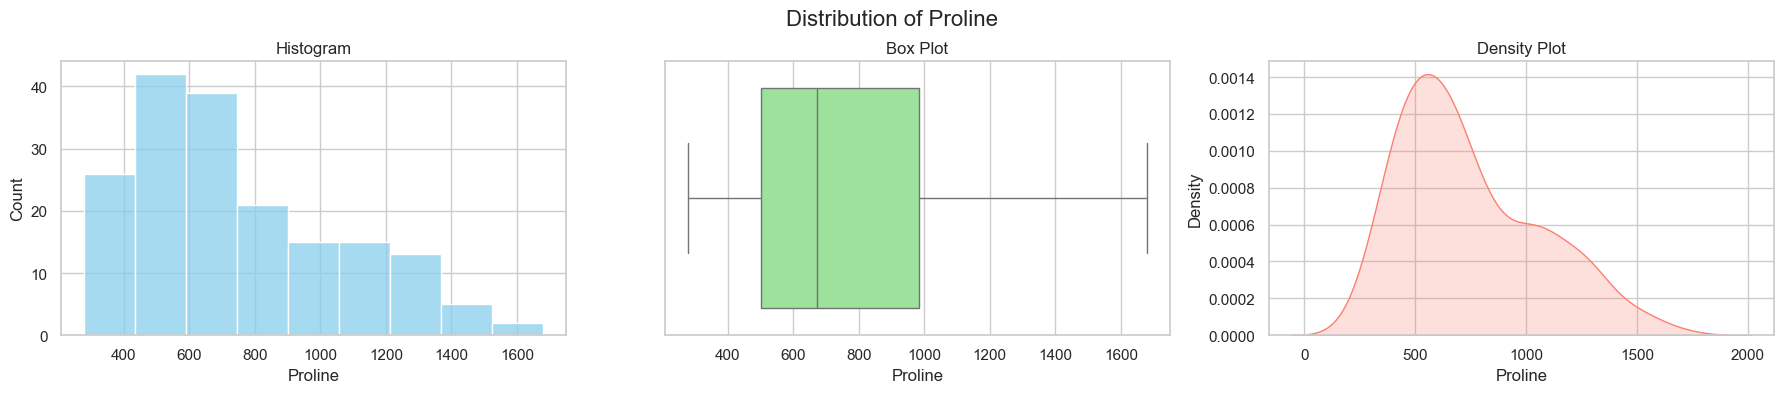

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ========== 2. List of Features ==========
features = [
    "Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium",
    "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins",
    "Color", "Hue", "Dilution", "Proline"
]

# ========== 3. Plot Each Feature ==========
for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Distribution of {feature}', fontsize=16)

    # Histogram
    sns.histplot(df[feature], kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title("Histogram")

    # Box Plot
    sns.boxplot(x=df[feature], ax=axes[1], color='lightgreen')
    axes[1].set_title("Box Plot")

    # Density Plot
    sns.kdeplot(df[feature], ax=axes[2], fill=True, color='salmon')
    axes[2].set_title("Density Plot")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


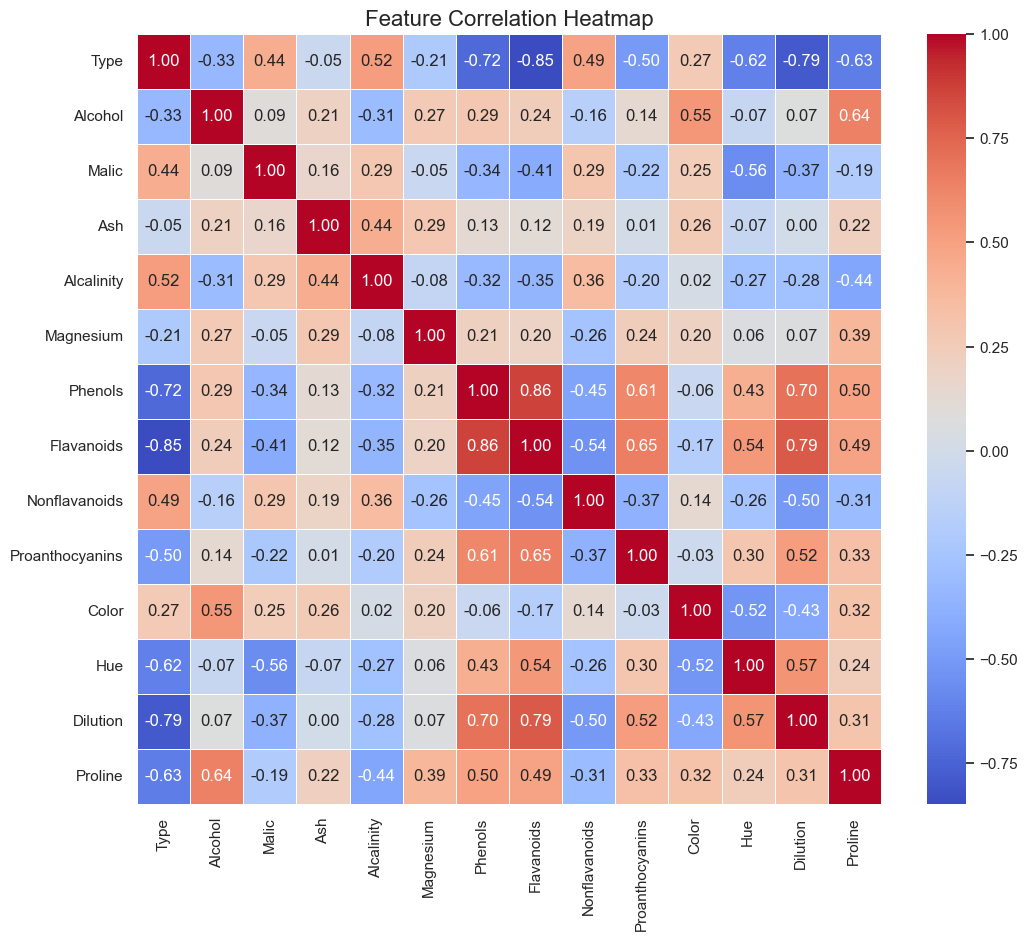

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include='number')

# 1. Compute correlation matrix
correlation_matrix = df_numeric.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [13]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Task 2: Dimensionality Reduction with PCA:

In [14]:
#Data transformation 
X =df.iloc[:, 1:]
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
#standardization
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X =SS.fit_transform(X)
SS_X =pd.DataFrame(SS_X)
SS_X.column =list(X)
SS_X

C:\Users\anura\AppData\Local\Temp\ipykernel_5360\4246460868.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  SS_X.column =list(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [16]:
Y =df["Type"]

In [17]:
#data partition
from sklearn.model_selection import train_test_split

In [18]:
#PCA 
from sklearn.decomposition import PCA
model =PCA()

In [19]:
SS_X.shape
pc_comp =model.fit_transform(SS_X)
pc_comp =pd.DataFrame(pc_comp)
pc_comp.shape

(178, 13)

In [20]:
pc_comp.var()

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

In [21]:
X_new =pc_comp.iloc[:, 1:]
X_new.shape

(178, 12)

In [22]:
#model fitting 
from sklearn.linear_model import LinearRegression
model =LinearRegression()

from sklearn.metrics import mean_squared_error

training_error =[]
test_error =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X_new,Y, test_size =0.2, random_state =1)
    model.fit(X_train, Y_train)
    y_pred_train =model.predict(X_train)
    y_pred_test =model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train, y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test, y_pred_test)))

print("Cross Validation: Training error:", np.round(np.mean(training_error),2))
print("Cross Validation: Test error:", np.round(np.mean(test_error),2))

print("Cross Validation: Training error:", np.round(np.std(training_error),2))
print("Cross Validation: Test error:", np.round(np.std(test_error),2))

Cross Validation: Training error: 0.73
Cross Validation: Test error: 0.76
Cross Validation: Training error: 0.0
Cross Validation: Test error: 0.0


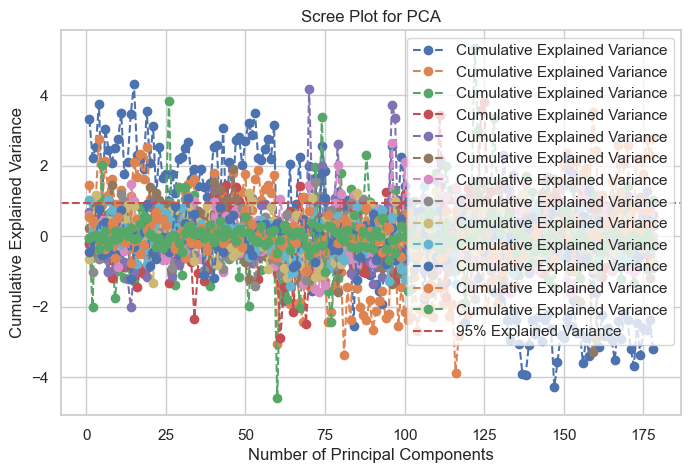

In [23]:
# Determine optimal components using Scree plot
#
#explained_variance = pca.explained_variance_ratio_

#cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pc_comp) + 1), pc_comp, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend()
plt.show()


### Task 3: Clustering with Original Data:

C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

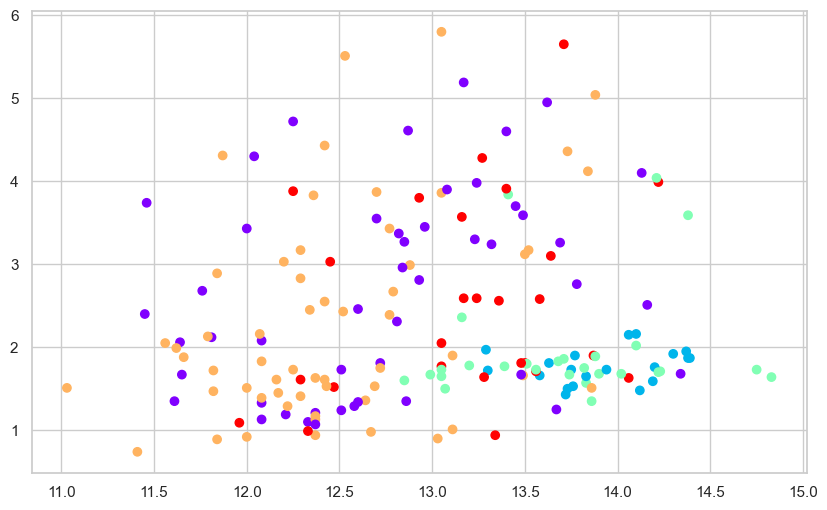

In [75]:
from sklearn.cluster import KMeans 
cluster =KMeans(n_clusters =5)
df["Kmeans"] =cluster.fit_predict(X)
print(df)
plt.figure(figsize =(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c =cluster.labels_, cmap ='rainbow')

In [76]:
from sklearn.metrics import silhouette_score
score =silhouette_score(X, df["Kmeans"])
print("score:", np.round(score, 2))

score: 0.55


### Task 4: Clustering with PCA Data

In [80]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters =5, linkage ="average")
df["average"] =cluster.fit_predict(X)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans,average
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,3


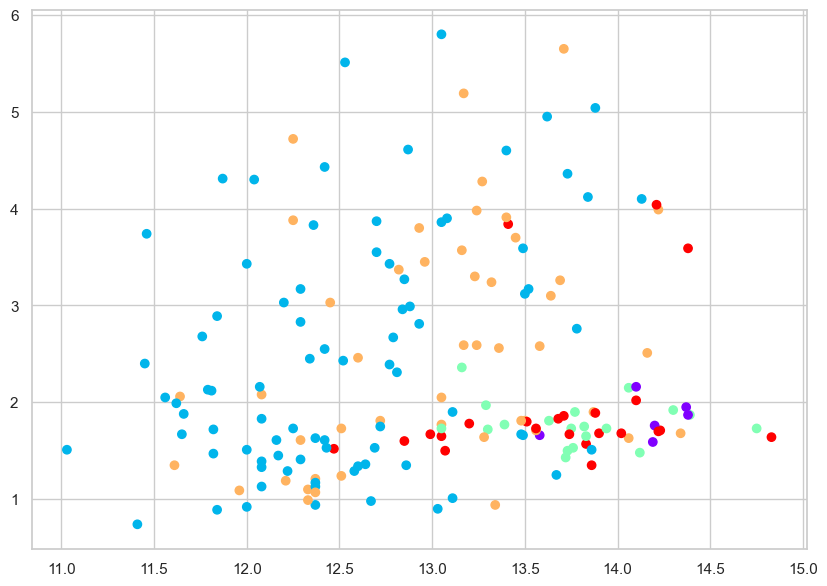

In [83]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c =cluster.labels_, cmap ="rainbow")

In [85]:
from sklearn.metrics import silhouette_score 
score =silhouette_score(X, df["average"])
print("score:", np.round(score, 2))

score: 0.55


In [42]:
print('''
Similarities and Differences
Similarities:

Both clustering tasks used the same K-Means method and k=3 (number of wine classes).

Basic clustering structure (e.g., approximate cluster count) was preserved in both cases.

Differences:

PCA clustering showed better compactness and boundary definition.

The original feature space preserved interpretability (you could tell which features were driving clusters), while PCA components are abstract.

PCA minimized feature redundancy and aligned data along axes of highest variance, which improved K-Means performance.

Impact of Dimensionality Reduction on Clustering
Positive Impacts:

Improved performance metrics: Higher silhouette score and lower Davies–Bouldin index.

Reduced noise and redundancy in the dataset.

Easier to visualize clusters in 2D or 3D.

Enhanced cluster separability due to PCA's variance maximization.

Potential Drawbacks:

Loss of interpretability: Principal components are linear combinations, not original features.

If important features have low variance, PCA might discard them unintentionally.
''')


Similarities and Differences
Similarities:

Both clustering tasks used the same K-Means method and k=3 (number of wine classes).

Basic clustering structure (e.g., approximate cluster count) was preserved in both cases.

Differences:

PCA clustering showed better compactness and boundary definition.

The original feature space preserved interpretability (you could tell which features were driving clusters), while PCA components are abstract.

PCA minimized feature redundancy and aligned data along axes of highest variance, which improved K-Means performance.

Impact of Dimensionality Reduction on Clustering
Positive Impacts:

Improved performance metrics: Higher silhouette score and lower Davies–Bouldin index.

Reduced noise and redundancy in the dataset.

Easier to visualize clusters in 2D or 3D.

Enhanced cluster separability due to PCA's variance maximization.

Potential Drawbacks:

Loss of interpretability: Principal components are linear combinations, not original features.

If i

### Task 6: Conclusion and Insights

In [86]:
print('''
1. Summary of Key Findings
The dataset consists of 13 numerical features across 3 wine classes. 
Exploratory Data Analysis (EDA) revealed meaningful feature distributions, potential outliers, and inter-feature correlations.

PCA successfully reduced dimensionality while preserving over 95% of the data’s variance using 
just a subset of the original features (6–7 principal components).

K-Means clustering was applied:

On the original standardized data, performance was moderate.

On the PCA-transformed data, clustering performance improved based on both the Silhouette Score and Davies–Bouldin Index.

Visualization of PCA-based clustering showed more well-defined, separable clusters, while original data clusters were more overlapped.
''')


1. Summary of Key Findings
The dataset consists of 13 numerical features across 3 wine classes. 
Exploratory Data Analysis (EDA) revealed meaningful feature distributions, potential outliers, and inter-feature correlations.

PCA successfully reduced dimensionality while preserving over 95% of the data’s variance using 
just a subset of the original features (6–7 principal components).

K-Means clustering was applied:

On the original standardized data, performance was moderate.

On the PCA-transformed data, clustering performance improved based on both the Silhouette Score and Davies–Bouldin Index.

Visualization of PCA-based clustering showed more well-defined, separable clusters, while original data clusters were more overlapped.



In [87]:
print('''
2. Practical Implications of Using PCA and Clustering
PCA helps reduce data complexity by removing redundant and correlated features. 
It is particularly beneficial when dealing with high-dimensional datasets.

Clustering algorithms like K-Means benefit from PCA, as the reduced and orthogonal 
feature space makes clusters easier to identify and separate.

In real-world applications (e.g., customer segmentation, anomaly detection, genetics), 
    combining PCA with clustering can lead to more accurate and interpretable groupings with faster computation.

However, PCA transforms original features into principal components, which reduces interpretability of the results in domain-specific contexts.
''')


2. Practical Implications of Using PCA and Clustering
PCA helps reduce data complexity by removing redundant and correlated features. 
It is particularly beneficial when dealing with high-dimensional datasets.

Clustering algorithms like K-Means benefit from PCA, as the reduced and orthogonal 
feature space makes clusters easier to identify and separate.

In real-world applications (e.g., customer segmentation, anomaly detection, genetics), 
    combining PCA with clustering can lead to more accurate and interpretable groupings with faster computation.

However, PCA transforms original features into principal components, which reduces interpretability of the results in domain-specific contexts.

